In [ ]:
!pip install transformers

In [2]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds
  


# # Open the image file
# with open('D:\\Major23\\ig.png', 'rb') as f:
#     img = Image.open(f)


# predict_step(['D:\\Major23\\ig.png'])

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


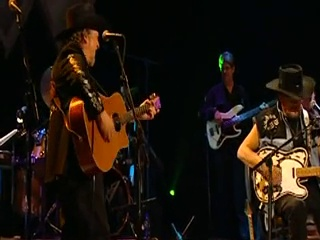

In [4]:
from IPython.display import Image
Image("D:\\Major23\\ig.png") # replace filename.jpg with the name of your image file


In [5]:
from PIL import Image
# Open the image file
with open('D:\\Major23\\ig.png', 'rb') as f:
    img = Image.open(f)

# Show the image
predict_step(['D:\\Major23\\ig.png'])

['a crowd of people standing around a drum set']

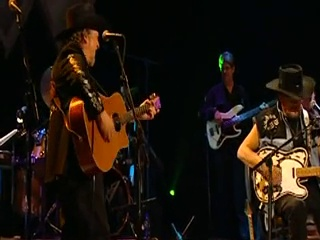

In [7]:
from IPython.display import Image
Image("ig.png") # replace filename.jpg with the name of your image file


In [34]:
from PIL import Image
# Open the image file
with open('D:\\Major23\\test2.png', 'rb') as f:
    img = Image.open(f)

# Show the image
predict_step(['D:\\Major23\\test2.png'])

['a crowd of people standing around a stage']

In [51]:
import os
import json

# Assuming you have a single frame folder and ID
image_paths = "D:\\Major23\\Filtered\\filtered_frame_video194_1.png"
frame_id = 1

# Assuming you have a function that can predict captions for each frame
def predict_caption(image_paths):

    images = []
    for image_path in image_paths:
      i_image = Image.open(image_paths)
      if i_image.mode != "RGB":
        i_image = i_image.convert(mode="RGB")

      images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds
    
# Get the predicted caption for the frame
res = predict_caption(image_paths)

# Create a dictionary to store the frame data
frame_data = {
    "folder_path": image_paths,
    "frame_id": frame_id,
    "caption": res
}

# Check if the JSON file already exists
if os.path.exists("frames.json"):
    # If the file exists, load the existing data
    with open("frames.json", "r") as f:
        frames = json.load(f)
    # Append the new frame data to the existing data
    frames.append(frame_data)
    # Write the updated data back to the file
    with open("frames.json", "w") as f:
        json.dump(frames, f)
else:
    # If the file doesn't exist, create a new file and write the frame data
    with open("frames.json", "w") as f:
        json.dump([frame_data], f)

KeyboardInterrupt: 

In [59]:
import os
import json
from PIL import Image

def predict_caption(image_paths):

    images = []
    for image_path in image_paths:
      i_image = Image.open(image_paths)
      if i_image.mode != "RGB":
        i_image = i_image.convert(mode="RGB")

      images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds

def generate_json_file(folder_path):
    image_data = []
    frame_id = 1

    # Iterate through all the files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            frame_path = os.path.join(folder_path, filename)

            # Predict caption for the frame
            caption = predict_caption(frame_path)  # Pass the frame path as a list

            # Create image data dictionary
            image_info = {
                "folder_path": folder_path,
                "frame_id": frame_id,
                "caption": caption
            }

            # Add image data to the list
            image_data.append(image_info)

            # Increment frame ID
            frame_id += 1

    # Convert image data to JSON
    json_data = json.dumps(image_data, indent=4)

    # Write JSON data to a file
    with open("image_frames1.json", "w") as file:
        file.write(json_data)

# Provide the folder path containing image frames
folder_path = r"D:\Major23\random"  # Make sure to specify the complete folder path

# Generate JSON file
generate_json_file(folder_path)


In [65]:
import os
import json
from PIL import Image

def predict_caption(image_paths):

    images = []
    for image_path in image_paths:
      i_image = Image.open(image_paths)
      if i_image.mode != "RGB":
        i_image = i_image.convert(mode="RGB")

      images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds[0]

def generate_json_file(folder_path):
    image_data = []
    frame_id = 1

    # Iterate through all the files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            frame_path = os.path.join(folder_path, filename)

            # Predict caption for the frame
            caption = predict_caption(frame_path)  # Pass the frame path as a list

            # Create image data dictionary
            image_info = {
                "folder_path": folder_path,
                "frame_id": frame_id,
                "caption": caption
            }
            # Increment frame ID
            frame_id += 1

            # Add image data to the list
        image_data.append(image_info)

            

    # Convert image data to JSON
    json_data = json.dumps(image_data, indent=4)

    # Write JSON data to a file
    with open("image_frames1.json", "w") as file:
        file.write(json_data)

# Provide the folder path containing image frames
folder_path = r"D:\Major23\Filtered"  # Make sure to specify the complete folder path

# Generate JSON file
generate_json_file(folder_path)


In [9]:
import os
import json
from PIL import Image

def predict_caption(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds[0]

def generate_json_file(folder_path):
    image_data = []
    frame_id = 1

    # Recursive function to traverse folders inside folders
    def traverse_folder(current_path):
        nonlocal frame_id

        for filename in os.listdir(current_path):
            file_path = os.path.join(current_path, filename)

            if os.path.isdir(file_path):
                # Recursively traverse subfolder
                traverse_folder(file_path)
                # Reset frame ID to 1 for each new folder
                frame_id = 1
            elif filename.endswith(".jpg") or filename.endswith(".png"):
                # Predict caption for the frame
                caption = predict_caption([file_path])  # Pass the frame path as a list

                # Create image data dictionary
                image_info = {
                    "folder_path": current_path,
                    "frame_id": frame_id,
                    "caption": caption
                }
                # Increment frame ID
                frame_id += 1

                # Add image data to the list
                image_data.append(image_info)

    # Start traversing from the root folder
    traverse_folder(folder_path)

    # Convert image data to JSON
    json_data = json.dumps(image_data, indent=4)

    # Write JSON data to a file
    with open("image_frames3.json", "w") as file:
        file.write(json_data)

# Provide the folder path containing image frames
folder_path = r"D:\\Major23\\random"  # Make sure to specify the complete folder path

# Generate JSON file
generate_json_file(folder_path)


In [20]:
import os
import json
from PIL import Image

def predict_caption(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds[0]

def generate_json_file(folder_path):
    image_data = []
    frame_id = 1

    # Recursive function to traverse folders inside folders
    def traverse_folder(current_path):
        nonlocal frame_id

        for filename in os.listdir(current_path):
            file_path = os.path.join(current_path, filename)

            if os.path.isdir(file_path):
                # Recursively traverse subfolder
                traverse_folder(file_path)
            elif filename.endswith(".jpg") or filename.endswith(".png"):
                # Predict caption for the frame
                caption = predict_caption([file_path])  # Pass the frame path as a list

                # Create image data dictionary
                image_info = {
                    "folder_path": current_path,
                    "frame_id": frame_id,
                    "caption": caption
                }
                # Increment frame ID
                frame_id += 1

                # Add image data to the list
                image_data.append(image_info)

    # Start traversing from the root folder
    traverse_folder(folder_path)

    # Convert image data to JSON
    json_data = json.dumps(image_data, indent=4)

    # Write JSON data to a file
    with open("image_frames.json", "w") as file:
        file.write(json_data)

# Provide the folder path containing image frames
folder_path = r"D:\\Major23\\random"  # Make sure to specify the complete folder path

# Generate JSON file
generate_json_file(folder_path)
